<a href="https://colab.research.google.com/github/chernoskutov1989dv/Self-Education/blob/main/sign_recognition_se_8_adam_optimizer_chernoskutov_dmitry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

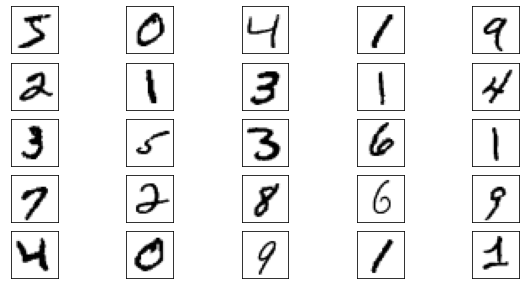

In [ ]:
plt.figure (figsize = (10,5))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train [i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод ее структуры в консоль

In [ ]:
model = keras.Sequential([

    Flatten(input_shape = (28, 28, 1)),
    Dense (128, activation = "relu"),
    Dense (10, activation ="softmax")

])
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компилляция НС с оптимизатором Adam

In [ ]:
model.compile (optimizer = 'adam',

              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Запуск обучения. validation_split - разбиение обучающей выборки на обучающую  и проверочную

In [ ]:

model.fit (x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2848 - accuracy: 0.9183 - val_loss: 0.1540 - val_accuracy: 0.9540
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1284 - accuracy: 0.9625 - val_loss: 0.1220 - val_accuracy: 0.9619
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0878 - accuracy: 0.9741 - val_loss: 0.1004 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0912 - val_accuracy: 0.9732


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9752


[0.08105754852294922, 0.9751999974250793]

Проверка распознвания цифр

1/1 [==============================] - 0s 41ms/step
[[2.6924317e-07 4.3433712e-08 6.3918792e-06 1.8437725e-04 2.2156262e-10
  1.5622408e-08 7.5774075e-12 9.9979812e-01 2.4833238e-07 1.0639196e-05]]
7
Распознанная цифра: 7


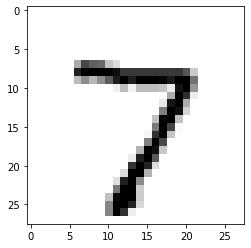

In [ ]:
n = 0
x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)
print(res) 
print( np.argmax(res) )
print( f"Распознанная цифра: {np.argmax (res)}" )

plt.imshow (x_test[n], cmap = plt.cm.binary)
plt.show()


Распознавание всей тестовой выборки

In [ ]:
pred = model.predict (x_test)
pred = np.argmax(pred, axis=1)
print (pred.shape)
print (pred[:20])
print (y_test[:20])

313/313 [==============================] - 0s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных результатов

In [ ]:
mask = pred == y_test

print (mask [:10])


x_false = x_test[~mask]

p_false = pred [~mask]


print (x_false.shape)


[ True  True  True  True  True  True  True  True False  True]
(248, 28, 28)


Значения сети: 6


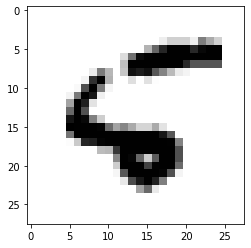

Значения сети: 2


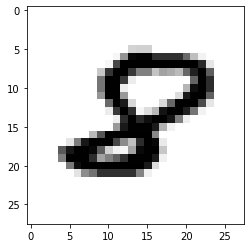

Значения сети: 7


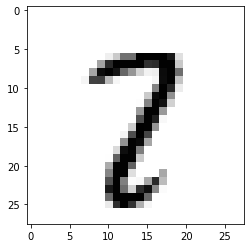

Значения сети: 3


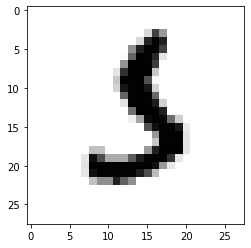

Значения сети: 7


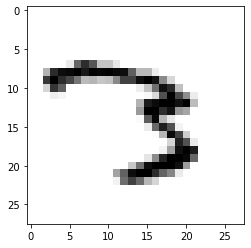

In [ ]:
for i in range(5):
  print("Значения сети: " + str(p_false[i]))
  plt.imshow(x_false[i], cmap = plt.cm.binary)
  plt.show()

